# Feed-forward neural network
- a.k.a. Multi_Layer Perceptrons(MLP), Fully-connected network

In [1]:
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("tensorflow version: ", tf.__version__)

tensorflow version:  1.1.0


## 0. Load MNIST data

In [3]:
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
X_train, Y_train = mnist.train.images, mnist.test.labels
X_val, Y_val = mnist.validation.images, mnist.validation.labels
X_test, Y_test = mnist.test.images, mnist.test.labels

In [5]:
# type check 
print("Type of X: ", type(X_train), type(X_val), type(X_test))
print("Type of Y: ", type(Y_train), type(Y_val), type(Y_test))

Type of X:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
Type of Y:  <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [6]:
# shape check(train data)
print(X_train.shape, X_val.shape, X_test.shape)
print(Y_train.shape, Y_val.shape, Y_test.shape)

(55000, 784) (5000, 784) (10000, 784)
(10000, 10) (5000, 10) (10000, 10)


In [7]:
# Number of data check
num_train = Y_train.shape[0]
num_val = Y_val.shape[0]
num_test = Y_test.shape[0]

print("Number of training points: ", num_train)
print("Number of validation points: ", num_val)
print("Number of test points: ", num_test)

Number of training points:  10000
Number of validation points:  5000
Number of test points:  10000


In [8]:
# dimension check
dim_X = X_train.shape[1]
pixel_X = np.sqrt(dim_X)
dim_Y = Y_train.shape[1]

print("Dimension of X: %d (%d x %d)" % (dim_X, pixel_X, pixel_X))
print("Dimension of Y: ", dim_Y)

Dimension of X: 784 (28 x 28)
Dimension of Y:  10


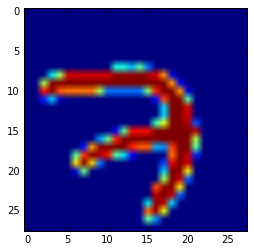

In [9]:
# test <- numpy.ndarray (28 X 28)
test = X_train[0,:].reshape(-1, 28)
plt.imshow(test)

## 1. Build the graph
Tensorflow에서는 모델을 'graph'로 구현한다.

### 1.1. Placeholder for inputs and outputs
- Shape of the placeholder for inputs: [batch_size, input_dimension]
- Shape of the placeholder for outputs: [batch_size, output_dimension]
- Placeholder의 batch_size를 None으로 하면, placeholder에 들어가기 전에 batch size를 조절해야 함

In [10]:
X = tf.placeholder(tf.float32, [None, dim_X])
Y = tf.placeholder(tf.float32, [None, dim_Y])

### 1.2 Add layers and variables

In [11]:
# Define hidden dimensions (number of nodes in each hidden layer)
hidden_dim_1 = dim_X
hidden_dim_2 = 300

In [12]:
weight_h1 = tf.Variable(tf.truncated_normal(shape=[dim_X, hidden_dim_1], mean=0.0,
                                            stddev=0.01))
bias_h1 = tf.Variable(tf.truncated_normal(shape=[hidden_dim_1],
                                          mean=0.0, stddev=0.01))

weight_h2 = tf.Variable(tf.truncated_normal(shape=[hidden_dim_1, hidden_dim_2],
                                            mean=0.0, stddev=0.01))
bias_h2 = tf.Variable(tf.truncated_normal(shape=[hidden_dim_2],
                                          mean=0.0, stddev=0.01))

weight_out = tf.Variable(tf.truncated_normal(shape=[hidden_dim_2, dim_Y],
                                             mean=0.0, stddev=0.01))
bias_out = tf.Variable(tf.truncated_normal(shape=[dim_Y],
                                           mean=0.0, stddev=0.01))

### 1.3 Model

In [13]:
# before y_hat
h1 = tf.nn.relu(tf.matmul(X, weight_h1) + bias_h1)
h2 = tf.nn.relu(tf.matmul(h1, weight_h2) + bias_h2)

logits = tf.matmul(h2, weight_out) + bias_out

In [14]:
print(X)
print(Y)
print(h1)
print(h2)
print(logits)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 10), dtype=float32)
Tensor("Relu:0", shape=(?, 784), dtype=float32)
Tensor("Relu_1:0", shape=(?, 300), dtype=float32)
Tensor("add_2:0", shape=(?, 10), dtype=float32)


## 2. Training

### 2.1 Loss function

- cross-entropy for classication 

Cross-entropy $ = - \sum_{\substack{j}}y_j \cdot \log(y'_j)$

In [15]:
#same code with "tf.nn.softmax_cross_entropy_with_logits"

Y_hat = tf.nn.softmax(logits)
cross_entropy_equation = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(Y_hat), reduction_indices=[1]))

In [16]:
print(Y_hat)
print(cross_entropy_equation)

Tensor("Softmax:0", shape=(?, 10), dtype=float32)
Tensor("Mean:0", shape=(), dtype=float32)


In [17]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
print(cross_entropy)

Tensor("Mean_1:0", shape=(), dtype=float32)


## 2.2 Training operator
1. define the optimizer
2. define training operator

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train_op = optimizer.minimize(cross_entropy)

In [19]:
print(optimizer)
print("="*100)
print(train_op)

name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_1/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_2/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_3/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_4/ApplyGradientDescent"
input: "^GradientDescent/update_Variable_5/ApplyGradientDescent"



## 2.3 Predicting operator
1. correct_prediction: boolean (True / False)
2. accuracy: correct_prediction -> tf.float32 -> mean

In [20]:
correct_prediction = tf.equal(tf.arg_max(logits, 1), tf.arg_max(Y, 1))

In [21]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [22]:
print(correct_prediction)
print(accuracy)

Tensor("Equal:0", shape=(?,), dtype=bool)
Tensor("Mean_2:0", shape=(), dtype=float32)


## 2.4 Run the session

In [23]:
# This is particularly convenient when working in interactive contexts like IPython
sess = tf.InteractiveSession() # sess = tf.Session

In [24]:
init = tf.global_variables_initializer()
sess.run(init)

In [25]:
for i in range(5000):
    batch_xs, batch_ys = mnist.train.next_batch(100) # minist function for batch
    sess.run(train_op, feed_dict={X: batch_xs, Y: batch_ys})
    if (i + 1) % 500 == 0:
        val_accuracy = sess.run(accuracy, feed_dict={X: X_val, Y:Y_val})
        print("[%d step] validation accuracy: %g" % (i+1, val_accuracy))

[500 step] validation accuracy: 0.885
[1000 step] validation accuracy: 0.927
[1500 step] validation accuracy: 0.9472
[2000 step] validation accuracy: 0.9596
[2500 step] validation accuracy: 0.9686
[3000 step] validation accuracy: 0.9718
[3500 step] validation accuracy: 0.9718
[4000 step] validation accuracy: 0.9772
[4500 step] validation accuracy: 0.977
[5000 step] validation accuracy: 0.9784


In [26]:
# test set
print(sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))

0.9752


In [27]:
sess.close()